<a href="https://colab.research.google.com/github/khadija9oor/CODSOFT/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name :Khadija Noor
#session: september
----------------------------------------------------------
#tasks
###sales prediction using machine learning in Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Loading the  sales dataset

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#checking for outier with  visualization

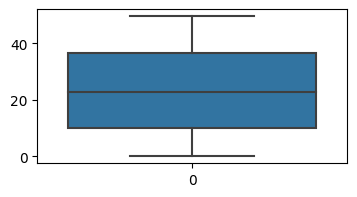

In [ ]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

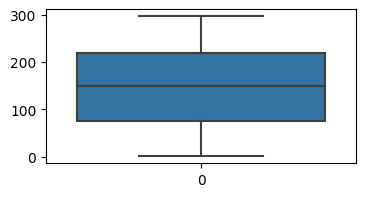

In [ ]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

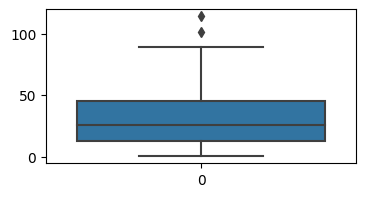

In [ ]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

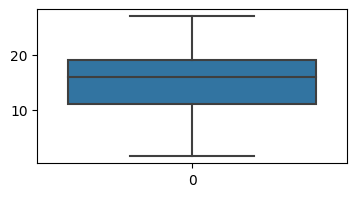

In [ ]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

##In above graph , there is no outlier expect "newspaper"

In [ ]:
IQR = df.Newspaper.quantile(0.75)  - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [ ]:
df = df.copy()

In [ ]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

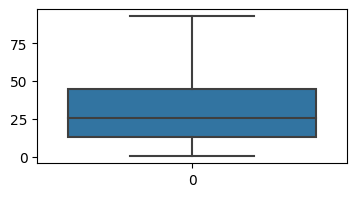

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

#Now  There is no outlier in dataset

<Axes: >

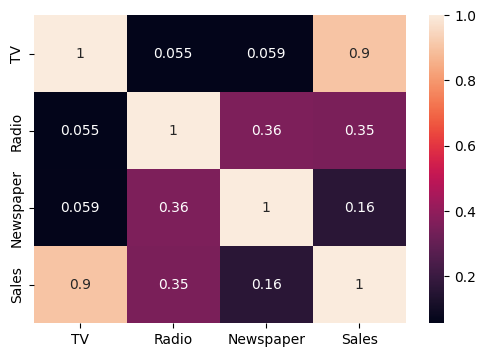

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

###All data set is numeric form now , we can train the model now

#Target Variable and feature

In [ ]:
# Create matrix of features
x = df.drop('Sales', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Sales'] # y is the column we're trying to predict


In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

###Model Training

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [ ]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
x_train.shape

(134, 3)

In [ ]:
x_test.shape

(66, 3)

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
y_train.shape

(134,)

In [ ]:

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

#model predictions

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(66,)
[15.79482533 19.26487908 16.91999909  8.84634325 20.53427403 10.25742342
 15.55088959 15.71857757 17.11264561  9.56562874 13.75518227  8.60602125
 11.29709993 20.73694643 20.46864506 17.67033058 19.23721808 12.24474829
 15.23214817 11.23827091 18.20286662 18.0373769  23.83232597 17.73157733
 22.14759039 15.17930059 24.51476243  6.30488089  5.34500196 18.13601762
 14.5259436  15.93144313 17.04580595 21.18642282 21.16451519 11.75194574
 12.41521191 18.6332082  10.56214343 18.21763892 18.85538758  7.42557013
 10.52479817 11.4430811  11.12211889 21.17737984 18.93279734 20.89506172
 19.29467753  9.15815871 22.11691731 21.83323582  9.90408437  8.17910911
 24.90997552  7.75438514 12.44451377 17.0930194  12.12768869 20.81873786
  6.9648597   9.26613912  9.7136165   8.07334532 18.83636117 13.15718696]


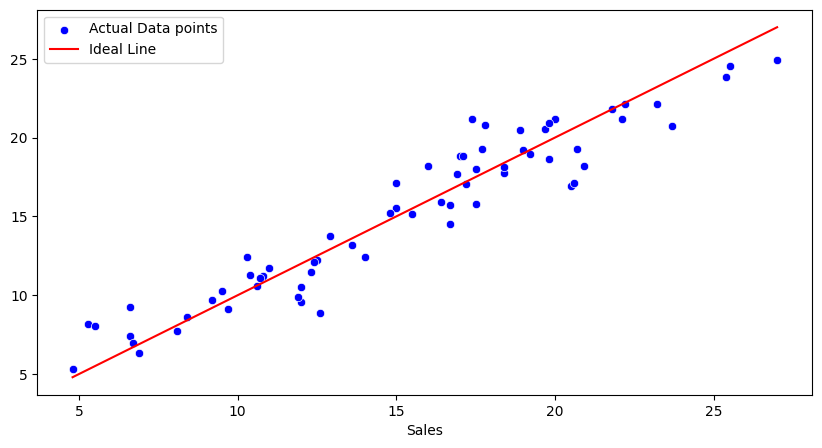

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))


# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         17.50 |         15.79
         20.70 |         19.26
         20.50 |         16.92
         12.60 |          8.85
         19.70 |         20.53
          9.50 |         10.26
         15.00 |         15.55
         16.70 |         15.72
         15.00 |         17.11
         12.00 |          9.57
         12.90 |         13.76
          8.40 |          8.61
         10.40 |         11.30
         23.70 |         20.74
         18.90 |         20.47
         16.90 |         17.67
         19.00 |         19.24
         12.50 |         12.24
         14.80 |         15.23
         10.80 |         11.24
         16.00 |         18.20
         17.50 |         18.04
         25.40 |         23.83
         18.40 |         17.73
         22.20 |         22.15
         15.50 |         15.18
         25.50 |         24.51
          6.90 |          6.30
          4.80 |          5.35
         18.40 |         18.14
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.


In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[ -2.19482533  -5.66487908  -3.31999909   4.75365675  -6.93427403
   3.34257658  -1.95088959  -2.11857757  -3.51264561   4.03437126
  -0.15518227   4.99397875   2.30290007  -7.13694643  -6.86864506
  -4.07033058  -5.63721808   1.35525171  -1.63214817   2.36172909
  -4.60286662  -4.4373769  -10.23232597  -4.13157733  -8.54759039
  -1.57930059 -10.91476243   7.29511911   8.25499804  -4.53601762
  -0.9259436   -2.33144313  -3.44580595  -7.58642282  -7.56451519
   1.84805426   1.18478809  -5.0332082    3.03785657  -4.61763892
  -5.25538758   6.17442987   3.07520183   2.1569189    2.47788111
  -7.57737984  -5.33279734  -7.29506172  -5.69467753   4.44184129
  -8.51691731  -8.23323582   3.69591563   5.42089089 -11.30997552
   5.84561486   1.15548623  -3.4930194    1.47231131  -7.21873786
   6.6351403    4.33386088   3.8863835    5.52665468  -5.23636117
   0.44281304]


<Axes: ylabel='Density'>

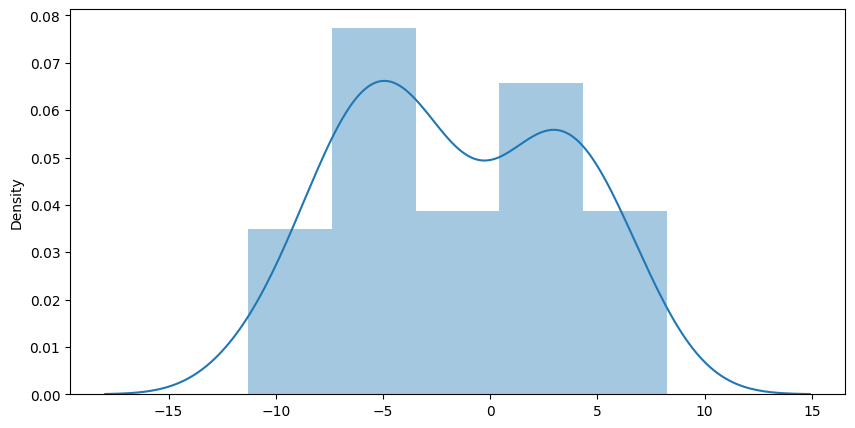

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

#Mean Squared error

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)

#measure r2_score
r2 =r2_score(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R2_score:" , r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
R2_score: 0.909579376275178
Mean Squared Error: 2.638726421729868
Root Mean Squared Error: 1.6244157170287008


#Descion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

r2_dt =r2_score(y_test, y_pred)
DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print("r2_score: ", r2_dt)
print('Decision Tree Regression: ',DTr)

r2_score:  0.909579376275178
Decision Tree Regression:  3.3253030303030298


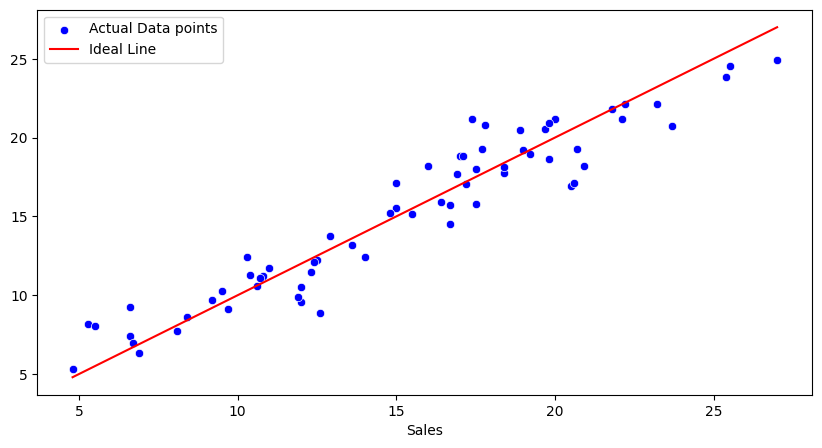

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()